In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
ttv_fit_mod = np.loadtxt('./ttv_mod.out')+277
ttv_fit_mod_dense = np.loadtxt('./ttv_mod_dense.out')+277



In [19]:
ttv_fit_mod_moon = np.loadtxt('./moon_MAP_times.dat')-54833


In [20]:
print(ttv_fit_mod_moon)
print(ttv_fit_mod)

[ 277.50535392  438.38819555  760.15483632  921.04589055 1081.92890114
 1242.80870387 1403.70138594 1564.57757743 4943.14824533]
[ 277.50609055  438.38707291  760.15499369  921.04578326 1081.92864963
 1242.80932035 1403.70210663 1564.57771299 4943.10482507]


In [21]:
ttv_input = pd.read_csv('./times_input.txt', sep='\t')
epochs = ttv_input['epoch'].values
times_input = ttv_input['time'].values
times_input_err = ttv_input['time_err'].values


koi3678_period = 160.883840387890871
koi3678_t0 = 277+0.506160949430603635





In [22]:
linear_ephemeris = []
for epoch in epochs:
    linear_ephemeris.append(koi3678_t0+(epoch*koi3678_period))
    
print(linear_ephemeris)

ttvs_input=[]
ttvs_mod=[]
ttvs_mod_moon=[]
for ii in range(0, len(times_input)):
    ttvs_input.append((times_input[ii]-linear_ephemeris[ii])*24*60)
    ttvs_mod.append((ttv_fit_mod[ii]-linear_ephemeris[ii])*24*60)
    print(ttv_fit_mod[ii])
    ttvs_mod_moon.append((ttv_fit_mod_moon[ii]-linear_ephemeris[ii])*24*60)
    print(ttv_fit_mod_moon[ii])
    print('')

    
    

    

linear_ephemeris_dense = []
for dense_epoch in range(0, 30):
    linear_ephemeris_dense.append(koi3678_t0+(dense_epoch*koi3678_period))
    

ttvs_mod_dense=[]
for ii in range(0, 30):
    ttvs_mod_dense.append((ttv_fit_mod_dense[ii]-linear_ephemeris_dense[ii])*24*60)
    

    

    

[277.5061609494306, 438.39000133732145, 760.1576821131032, 921.041522500994, 1081.9253628888848, 1242.8092032767759, 1403.6930436646667, 1564.5768840525575, 4943.137532198266]
277.50609054912655
277.5053539151195

438.3870729147954
438.3881955495817

760.154993693514
760.1548363175752

921.0457832628049
921.0458905526102

1081.9286496318678
1081.9289011380606

1242.8093203451606
1242.8087038653466

1403.7021066258155
1403.7013859440049

1564.577712986967
1564.5775774287613

4943.104825068884
4943.148245328761



In [23]:
colors = [
    "#581845",
    "#915F6D"]

In [24]:
ttvs_mod

[-0.10137643779671635,
 -4.2169284375177085,
 -3.8713242083940713,
 6.135497007671802,
 4.732909895428747,
 0.16857847400387982,
 13.050664054353547,
 1.1936655497993343,
 -47.09826631049509]

In [25]:
ttvs_mod_moon

[-1.1621294079759537,
 -2.6003343452066474,
 -4.097945560242806,
 6.289994327344175,
 5.095078813137661,
 -0.7191524581139674,
 12.012882246999652,
 0.9984617334703216,
 15.426907912624301]

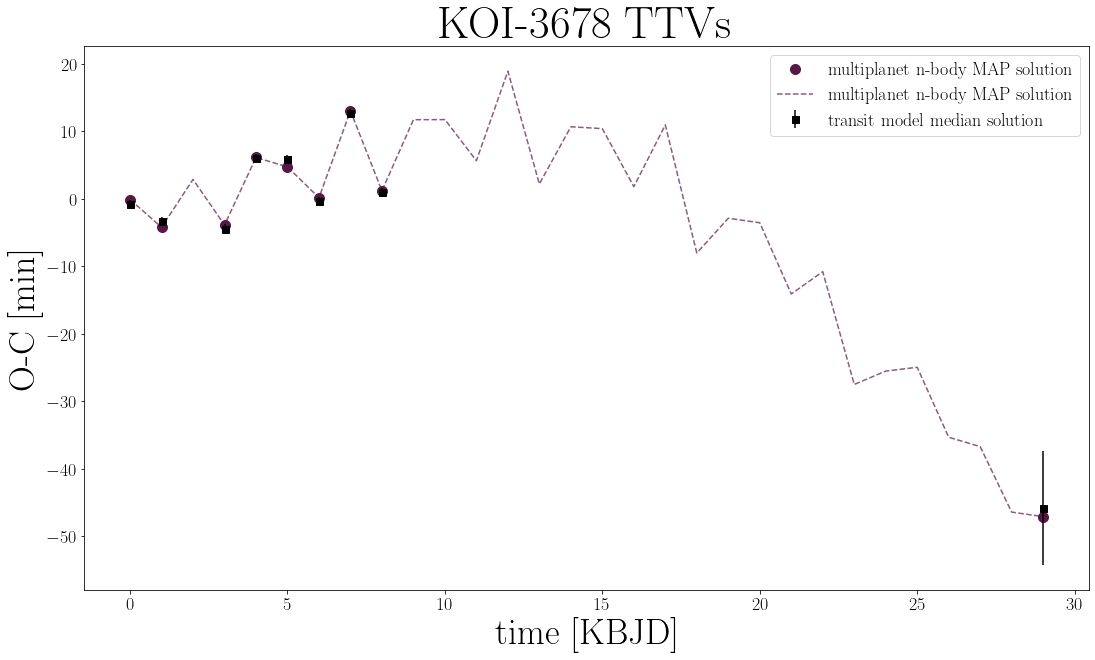

In [26]:
plt.figure(figsize=[18,10])
plt.errorbar(epochs, ttvs_input, yerr=times_input_err*24*60, ls= '', zorder=3, marker='s', color = 'k', ms=7, label='transit model median solution')
plt.plot(epochs, ttvs_mod, 'o', ls='', ms=10, color=colors[0], zorder=2, label = 'multiplanet n-body MAP solution')
plt.plot(range(0, 30), ttvs_mod_dense, ls='--', ms=10, color=colors[0], alpha=0.7, zorder=2, label = 'multiplanet n-body MAP solution')


plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

#plt.savefig('swift_fit_forecaster.pdf')

(array([-7.5, -5. , -2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

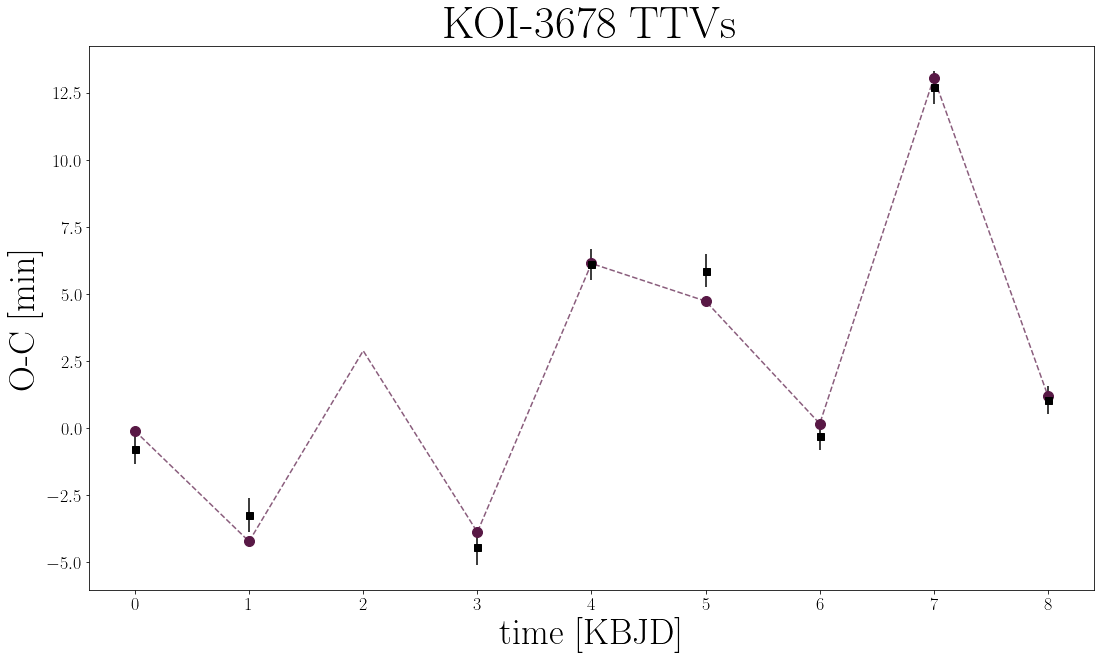

In [27]:
plt.figure(figsize=[18,10])
plt.errorbar(epochs[0:8], ttvs_input[0:8], yerr=times_input_err[0:8]*24*60, ls= '', marker='s', color = 'k', ms=7, label='transit model median solution')
plt.plot(epochs[0:8], ttvs_mod[0:8], 'o', ls='', ms=10, color=colors[0], zorder=2, label = 'multiplanet n-body MAP solution')
plt.plot(range(0, 9), ttvs_mod_dense[0:9], ls='--', ms=10, color=colors[0], alpha=0.7, zorder=2, label = 'multiplanet n-body MAP solution')


plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig('swift_fit_forecaster.pdf')

/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_91108/1018392593.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


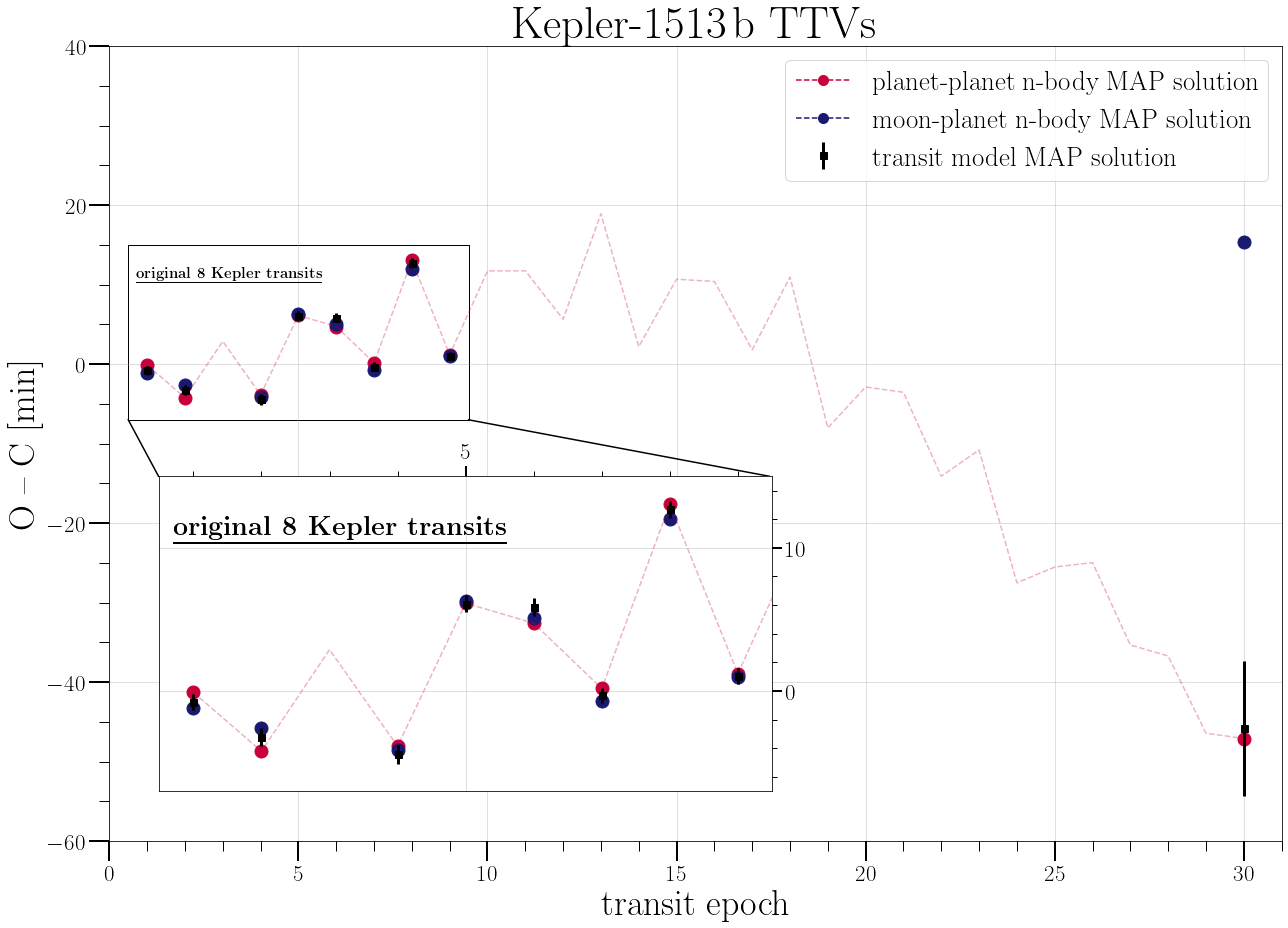

In [30]:
import matplotlib 
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec



matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)


colors = ["#C70039", "#191970"]


fig, ax = plt.subplots(figsize=[18,13])

#ax = plt.subplot2grid((2, 2), (0, 0), colspan=2)
#ax1 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
#ax2 = plt.subplot2grid((2, 2), (1, 1), colspan=1)



ax.text(0.7, 11, r'\underline{\textbf{original 8 Kepler transits}}', fontsize=27/1.8)
ax.plot(1, ttvs_mod[0],'o', ls='--', ms=10, color=colors[0], zorder=2, label = 'planet-planet n-body MAP solution')
ax.plot(1, ttvs_mod_moon[0],'o', ls='--', ms=10, color=colors[1], zorder=2, label = 'moon-planet n-body MAP solution')
ax.errorbar(epochs+1, ttvs_input, yerr=times_input_err*24*60, ls= '', elinewidth=3,
            zorder=3, marker='s', color = 'k', ms=7, label='transit model MAP solution')
ax.plot(epochs+1, ttvs_mod, 'o', ls='', ms=13, color=colors[0], zorder=2)
ax.plot(epochs+1, ttvs_mod_moon, 'o', ls='', ms=13, color=colors[1], zorder=2)
ax.plot(np.arange(0, 30)+1, ttvs_mod_dense, ls='--', ms=10, color=colors[0], alpha=0.3, zorder=2)

# Create a Rectangle patch
rect = patches.Rectangle((0.5, -7), 9, 22, edgecolor='k', facecolor='none')
ax.plot([0.5, 1.3], [-7,-14.1], color='k', marker='')
ax.plot([9.5, 17.45], [-7,-14.1], color='k', marker='')

# Add the patch to the Axes
ax.add_patch(rect)
ax.grid(visible=True, alpha=0.5)



zax = zoomed_inset_axes(ax, 1.8, loc=3,borderpad=5)
zax.errorbar(epochs[0:8]+1, ttvs_input[0:8], yerr=times_input_err[0:8]*24*60, ls= '', 
             elinewidth=3, zorder=3, marker='s', color = 'k', ms=7)
zax.plot(epochs[0:8]+1, ttvs_mod[0:8], 'o', ls='', ms=13, color=colors[0], zorder=2)
zax.plot(epochs[0:8]+1, ttvs_mod_moon[0:8], 'o', ls='', ms=13, color=colors[1], zorder=2)
zax.plot(np.arange(0, 10)+1, ttvs_mod_dense[0:10], ls='--', ms=10, color=colors[0], alpha=0.3, zorder=2)
zax.text(0.7, 11, r'\underline{\textbf{original 8 Kepler transits}}', fontsize=27)
zax.set_ylim(-7,15)
zax.yaxis.tick_right()
zax.xaxis.tick_top()
zax.grid(visible=True, alpha=0.5)
zax.set_xticks([0,5,10])
zax.set_yticks([0,10])
zax.set_xlim(0.5,9.5)




# We change the length of ticks 
ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=10, width=1, which='minor')
ax.minorticks_on()
# We change the length of ticks 
zax.tick_params('both', length=10, width=2, which='major')
zax.tick_params('both', length=5, width=1, which='minor')
zax.minorticks_on()


ax.set_title(r'Kepler-1513\,b TTVs', fontsize=45)
ax.set_ylabel('O -- C [min]', fontsize=36)
ax.set_xlabel('transit epoch', fontsize=36)
ax.set_xlim(0,31)
ax.set_ylim(-60,40)



ax.legend(fontsize=27, loc=1)

fig.tight_layout()
fig.savefig('koi3678_ttvs_wMoon.pdf')
